In [188]:
!gdown 'https://drive.google.com/uc?id=1VWBbqVXu7BgI55k72fp1Nh6N7Qx4KQ-I'

Downloading...
From: https://drive.google.com/uc?id=1VWBbqVXu7BgI55k72fp1Nh6N7Qx4KQ-I
To: /Users/nathalia/Personal/code-practice/Data Science Projects/Stroke Prediction/stroke-dataset.csv
100%|████████████████████████████████████████| 317k/317k [00:00<00:00, 2.30MB/s]


In [189]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Loading Dataset

`stroke-dataset.csv` dataset was taken from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset.

#### Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [190]:
working_dir = os.getcwd()
stroke_data_path = working_dir+'/stroke-dataset.csv'

In [191]:
stroke_data = read_csv(stroke_data_path)
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [192]:
stroke_data.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### Data Exploration

In [193]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Finding unique values

In [194]:
for col in stroke_data.columns:
    print(col, ": ", stroke_data[col].unique())

id :  [ 9046 51676 31112 ... 19723 37544 44679]
gender :  ['Male' 'Female' 'Other']
age :  [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e

#### Finding Imbalance in the Target Feature

In [195]:
num_stroke = len(stroke_data[stroke_data['stroke']==1])
num_no_stroke = len(stroke_data[stroke_data['stroke']==0])
print("Stroke: ", num_stroke)
print("No Stroke: ", num_no_stroke)

Stroke:  249
No Stroke:  4861


As seen, the target feature is highly imbalanced since the `Not Stroke` class has more cases.

#### Understanding Gender Feature Concerning Stroke Feature

In [196]:
for gender in stroke_data['gender'].unique():
    print(gender, ": ", len(stroke_data[stroke_data['gender']==gender]))

Male :  2115
Female :  2994
Other :  1


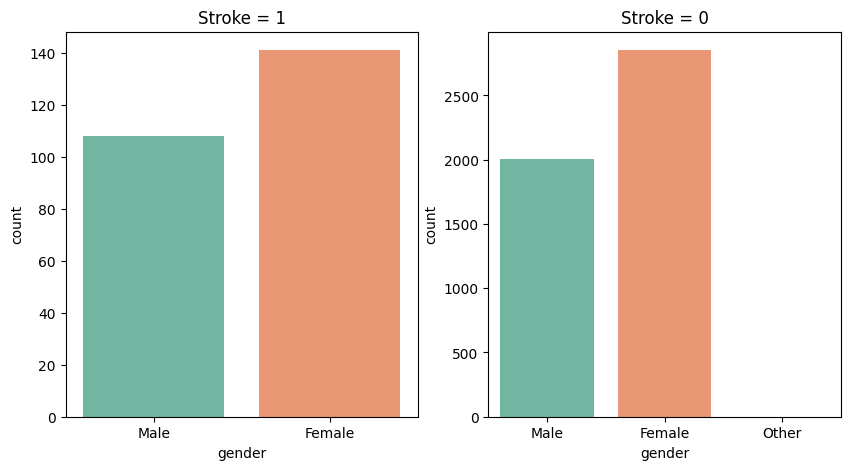

In [197]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Stroke = 1')
ax1 = sns.countplot(x='gender', data=stroke_data[stroke_data['stroke']==1], palette='Set2')
# ax1 = sns.countplot(x='gender', data=stroke_data[stroke_data['stroke']==1], palette='Set2', hue='gender',
#               saturation = 0.9)

plt.subplot(1,2,2)
plt.title('Stroke = 0')
ax2 = sns.countplot(x='gender', data=stroke_data[stroke_data['stroke']==0], palette='Set2')

In [198]:
print("No Stroke: ")
for gender in stroke_data[stroke_data['stroke']==0]['gender'].unique():
    print(gender, ": ", len(stroke_data.loc[(stroke_data['gender']==gender) 
                                            & (stroke_data['stroke']==0)])/num_no_stroke)
print("\n")
print("Stroke: ")
for gender in stroke_data[stroke_data['stroke']==1]['gender'].unique():
    print(gender, ": ", len(stroke_data.loc[(stroke_data['gender']==gender)
                                           & (stroke_data['stroke']==1)])/num_stroke)

No Stroke: 
Male :  0.41287800864019747
Female :  0.5869162723719399
Other :  0.0002057189878625797


Stroke: 
Male :  0.43373493975903615
Female :  0.5662650602409639


When comparing males and females, it can be seen that there is a higher percentage of women in the data. Although, as there is a high percentage of women both in the Stroke and Not Stroke categories, nothing can be inferred from gender features concerning predicting a stroke.

#### Understanding Hypertension Feature Concerning Stroke Feature¶

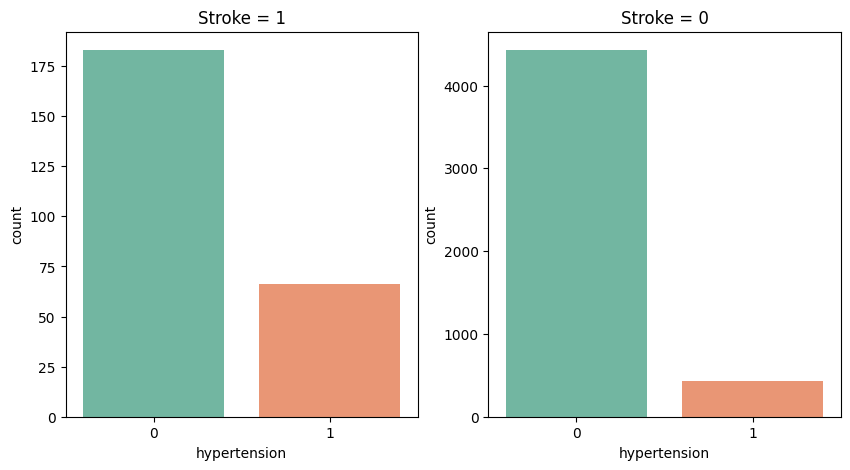

In [199]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Stroke = 1')
ax1 = sns.countplot(x='hypertension', data=stroke_data[stroke_data['stroke']==1], palette='Set2')

plt.subplot(1,2,2)
plt.title('Stroke = 0')
ax2 = sns.countplot(x='hypertension', data=stroke_data[stroke_data['stroke']==0], palette='Set2')

In [200]:
print("No Stroke: ")
for val in stroke_data[stroke_data['stroke']==0]['hypertension'].unique():
    print(val, ": ", len(stroke_data.loc[(stroke_data['hypertension']==val) 
                                        & (stroke_data['stroke']==0)])/num_no_stroke)
print("\n")
print("Stroke: ")
for val in stroke_data[stroke_data['stroke']==1]['hypertension'].unique():
    print(val, ": ", len(stroke_data.loc[(stroke_data['hypertension']==val)
                                        & (stroke_data['stroke']==1)])/num_stroke)

No Stroke: 
0 :  0.9111293972433656
1 :  0.08887060275663444


Stroke: 
0 :  0.7349397590361446
1 :  0.26506024096385544


The data shows that most people do not have hypertension. Although, those who suffer from hypertension have a higher chance of having a stroke.

#### Understanding Heart Disease Feature Concerning Stroke Feature

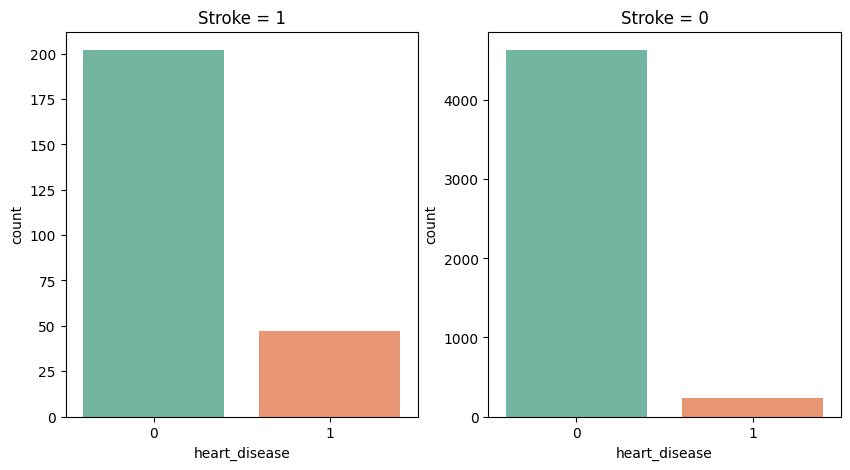

In [201]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Stroke = 1')
ax1 = sns.countplot(x='heart_disease', data=stroke_data[stroke_data["stroke"]==1], palette='Set2')

plt.subplot(1,2,2)
plt.title('Stroke = 0')
ax2 = sns.countplot(x='heart_disease', data=stroke_data[stroke_data["stroke"]==0], palette='Set2')

In [202]:
print("No Stroke: ")
for val in stroke_data[stroke_data['stroke']==0]['heart_disease'].unique():
    print(val, ": ", len(stroke_data.loc[(stroke_data['heart_disease']==val) &
                                        (stroke_data['stroke']==0)])/num_no_stroke)
print("\n")
print("Stroke: ")
for val in stroke_data[stroke_data['stroke']==1]['heart_disease'].unique():
    print(val, ": ", len(stroke_data.loc[(stroke_data['heart_disease']==val) &
                                        (stroke_data['stroke']==1)])/num_stroke)

No Stroke: 
0 :  0.9528903517794692
1 :  0.04710964822053076


Stroke: 
1 :  0.18875502008032127
0 :  0.8112449799196787


The data shows that most people do not have heart disease. Although, those who suffer from heart disease have a higher chance of having a stroke.

#### Understanding Marital Status Feature Concerning Stroke Feature

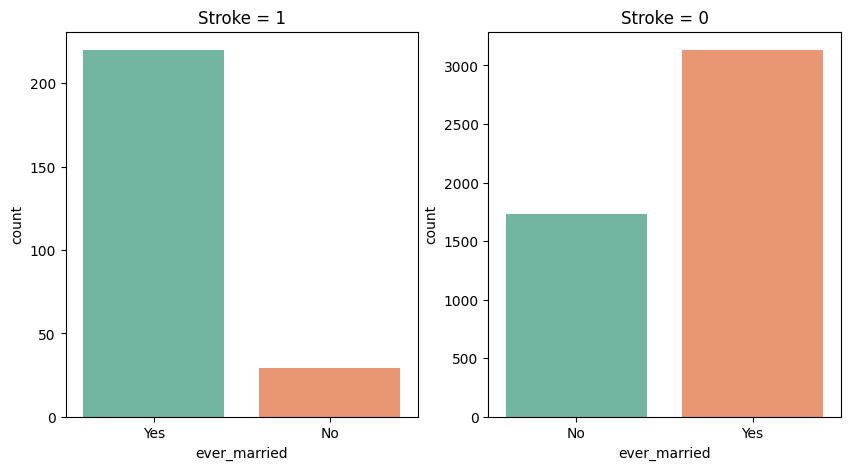

In [203]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Stroke = 1')
ax1 = sns.countplot(x='ever_married', data=stroke_data[stroke_data['stroke']==1], palette='Set2')

plt.subplot(1,2,2)
plt.title('Stroke = 0')
ax2 = sns.countplot(x='ever_married', data=stroke_data[stroke_data['stroke']==0], palette='Set2')

In [204]:
print("No Stroke: ")
for val in stroke_data[stroke_data['stroke']==0]['ever_married'].unique():
    print(val, ": ", len(stroke_data.loc[(stroke_data['ever_married']==val) &
                                        (stroke_data['stroke']==0)])/num_no_stroke)
print("\n")
print("Stroke: ")
for val in stroke_data[stroke_data['stroke']==1]['ever_married'].unique():
    print(val, ": ", len(stroke_data.loc[(stroke_data['ever_married']==val) &
                                        (stroke_data['stroke']==1)])/num_stroke)

No Stroke: 
No :  0.35548241102653777
Yes :  0.6445175889734622


Stroke: 
Yes :  0.8835341365461847
No :  0.11646586345381527


The data shows there is a higher percentage of people who have ever married. Besides, those who have ever married have a higher chance of having a stroke.

#### Understanding Work Type Feature Concerning Stroke Feature

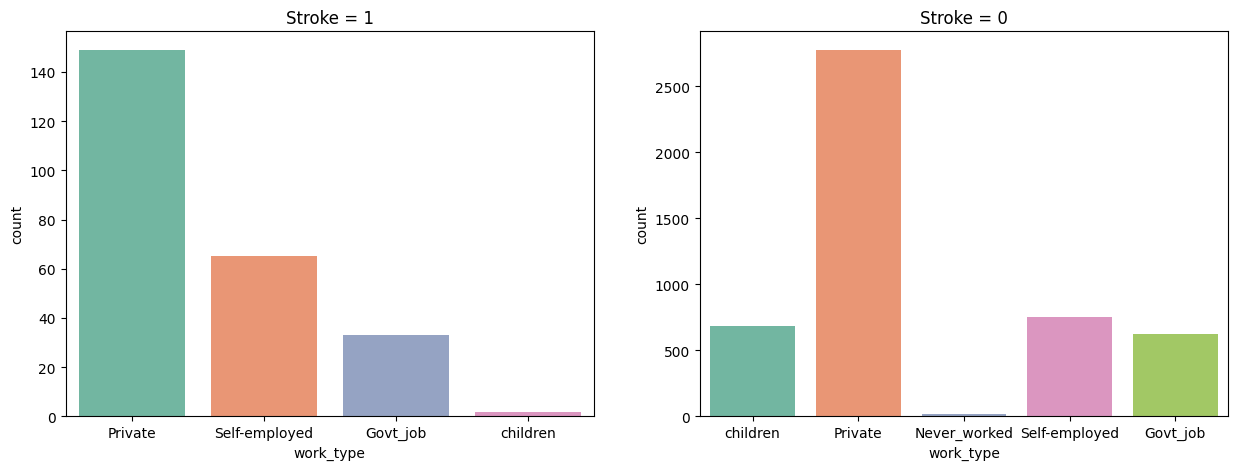

In [205]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Stroke = 1')
ax1 = sns.countplot(x='work_type', data=stroke_data[stroke_data['stroke']==1], palette='Set2')

plt.subplot(1,2,2)
plt.title('Stroke = 0')
ax2 = sns.countplot(x='work_type', data=stroke_data[stroke_data['stroke']==0], palette='Set2')

In [206]:
print("No Stroke: ")
for val in stroke_data[stroke_data['stroke']==0]['work_type'].unique():
    print(val, ": ", len(stroke_data.loc[(stroke_data['work_type']==val) &
                                        (stroke_data['stroke']==0)])/num_no_stroke)
print("\n")
print("Stroke: ")
for val in stroke_data[stroke_data['stroke']==1]['work_type'].unique():
    print(val, ": ", len(stroke_data.loc[(stroke_data['work_type']==val) &
                                        (stroke_data['stroke']==1)])/num_stroke)

No Stroke: 
children :  0.1409175066858671
Private :  0.5710759103065213
Never_worked :  0.004525817732976754
Self-employed :  0.1551121168483851
Govt_job :  0.12836864842624973


Stroke: 
Private :  0.5983935742971888
Self-employed :  0.26104417670682734
Govt_job :  0.13253012048192772
children :  0.008032128514056224


It can be said that children and people who have never worked, have a lower chance of suffering from a stroke. Data show that there is a higher percentage of people doing private jobs. Although, there is almost the same likelihood of having or not having a stroke from people performing private jobs. Besides, self-employed people have a higher chance of suffering from a stroke.

#### Understanding Residence Type Feature Concerning Stroke Feature

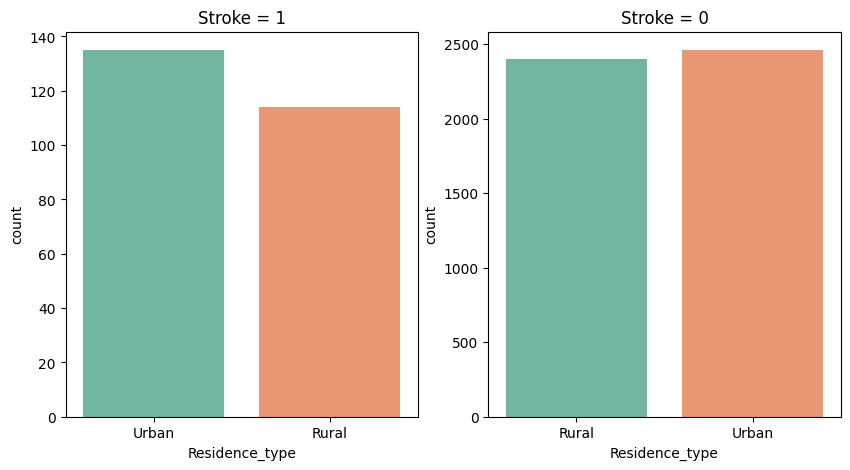

In [207]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Stroke = 1')
ax1 = sns.countplot(x='Residence_type', data=stroke_data[stroke_data['stroke']==1], palette='Set2')

plt.subplot(1,2,2)
plt.title('Stroke = 0')
ax2 = sns.countplot(x='Residence_type', data=stroke_data[stroke_data['stroke']==0], palette='Set2')

In [208]:
print("No Stroke: ")
for val in stroke_data[stroke_data['stroke']==0]['Residence_type'].unique():
    print(val, ": ", len(stroke_data.loc[(stroke_data['Residence_type']==val) &
                                        (stroke_data['stroke']==0)])/num_no_stroke)
print("\n")
print("Stroke: ")
for val in stroke_data[stroke_data['stroke']==1]['Residence_type'].unique():
    print(val, ": ", len(stroke_data.loc[(stroke_data['Residence_type']==val) &
                                        (stroke_data['stroke']==1)])/num_stroke)

No Stroke: 
Rural :  0.4937255708701913
Urban :  0.5062744291298087


Stroke: 
Urban :  0.5421686746987951
Rural :  0.4578313253012048


Data show that people who live in rural areas have a lower chance of having a stroke compared to those living in urban areas.

#### Understanding Smoking Status Feature Concerning Stroke Feature

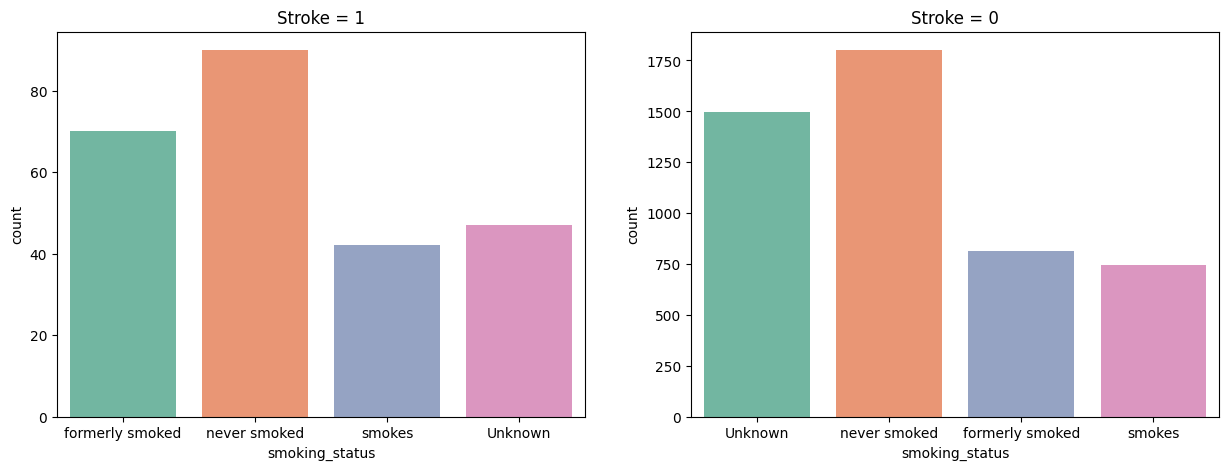

In [209]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Stroke = 1')
ax1 = sns.countplot(x='smoking_status', data=stroke_data[stroke_data['stroke']==1], palette='Set2')

plt.subplot(1,2,2)
plt.title('Stroke = 0')
ax2 = sns.countplot(x='smoking_status', data=stroke_data[stroke_data['stroke']==0], palette='Set2')

In [210]:
print("No Stroke: ")
for val in stroke_data[stroke_data['stroke']==0]['smoking_status'].unique():
    print(val, ": ", len(stroke_data.loc[(stroke_data['smoking_status']==val) &
                                        (stroke_data['stroke']==0)])/num_no_stroke)
print("\n")
print("Stroke: ")
for val in stroke_data[stroke_data['stroke']==1]['smoking_status'].unique():
    print(val, ": ", len(stroke_data.loc[(stroke_data['smoking_status']==val) &
                                        (stroke_data['stroke']==1)])/num_stroke)

No Stroke: 
Unknown :  0.3079613248302818
never smoked :  0.37070561612836866
formerly smoked :  0.16766097510800246
smokes :  0.15367208393334705


Stroke: 
formerly smoked :  0.28112449799196787
never smoked :  0.3614457831325301
smokes :  0.1686746987951807
Unknown :  0.18875502008032127


Data show that people who have formerly smoked or have never smoked have a higher chance of suffering a stroke than those who smoke or whose data are unknown.

#### Understanding Age Feature Concerning Stroke Feature

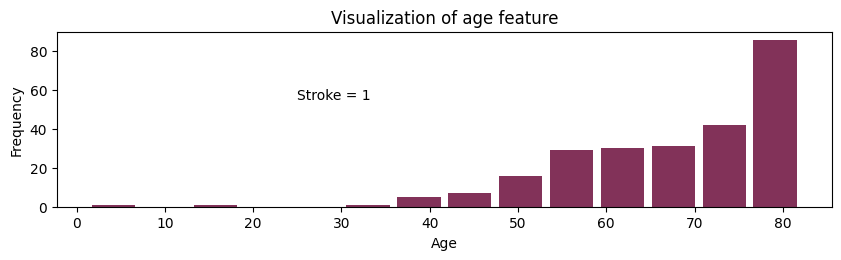

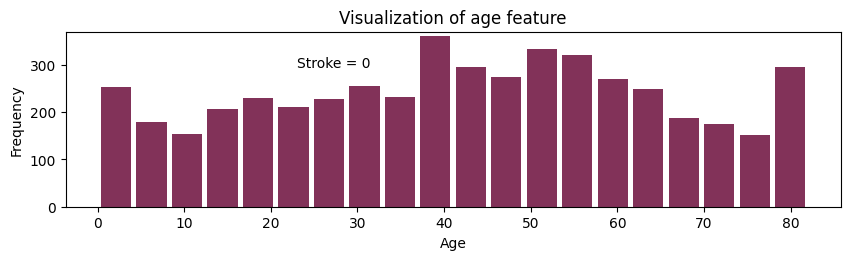

In [211]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
n, bins, patches = plt.hist(x=stroke_data[stroke_data['stroke']==1]['age'], bins='auto', color = '#741b47',
                           alpha = 0.9, rwidth=0.85)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Visualization of age feature')
plt.text(25,55, 'Stroke = 1')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(2,1,2)
n, bins, patches = plt.hist(x=stroke_data[stroke_data['stroke']==0]['age'], bins='auto', color = '#741b47',
                           alpha = 0.9, rwidth=0.85)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Visualization of age feature')
plt.text(23,295, 'Stroke = 0')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

As seen, a stroke is more likely in older people. Thus, age feature could be a good feature to use for classification.

#### Understanding Average Glucose Level Feature Concerning Stroke Feature

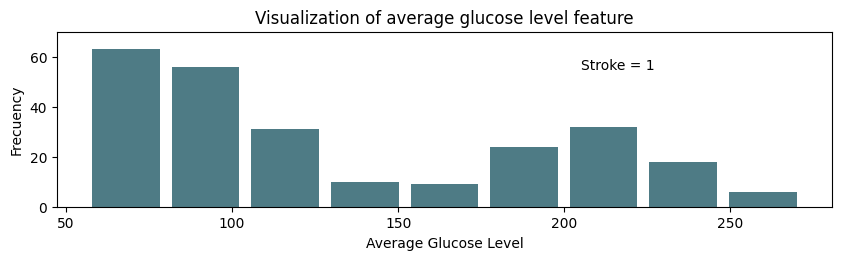

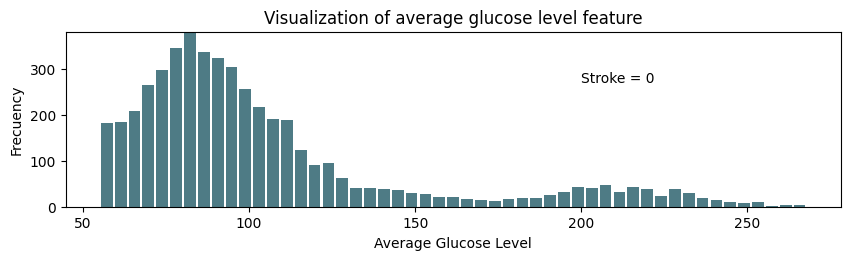

In [212]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
n, bins, patches = plt.hist(x=stroke_data[stroke_data['stroke']==1]['avg_glucose_level'], bins='auto', 
                            color='#134f5c', alpha=0.75, rwidth=0.85)
plt.xlabel('Average Glucose Level')
plt.ylabel('Frecuency')
plt.title('Visualization of average glucose level feature')
plt.text(205,55, 'Stroke = 1')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(2,1,2)
n, bins, patches = plt.hist(x=stroke_data[stroke_data['stroke']==0]['avg_glucose_level'], bins='auto',
                           color='#134f5c', alpha=0.75, rwidth=0.85)
plt.xlabel('Average Glucose Level')
plt.ylabel('Frecuency')
plt.title('Visualization of average glucose level feature')
plt.text(200,270, 'Stroke = 0')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()


People who suffer from a stroke have a lower average glucose level in their blood.

#### Understanding Body Mass Index (BMI) Feature Concerning Stroke Feature

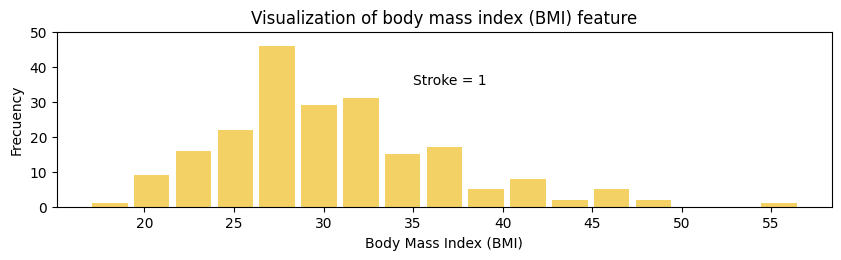

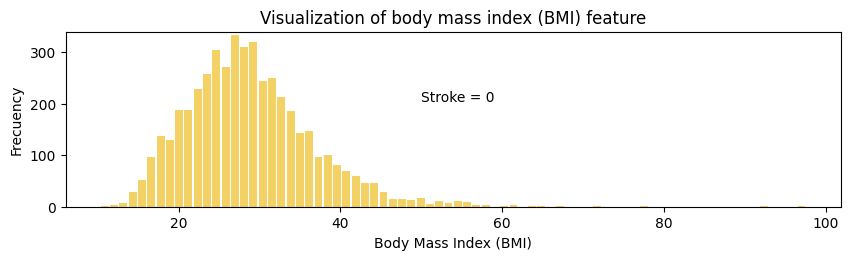

In [213]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
n, bins, patches = plt.hist(x=stroke_data[stroke_data['stroke']==1]['bmi'], bins='auto', 
                            color='#f1c232', alpha=0.75, rwidth=0.85)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frecuency')
plt.title('Visualization of body mass index (BMI) feature')
plt.text(35,35, 'Stroke = 1')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(2,1,2)
n, bins, patches = plt.hist(x=stroke_data[stroke_data['stroke']==0]['bmi'], bins='auto',
                           color='#f1c232', alpha=0.75, rwidth=0.85)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frecuency')
plt.title('Visualization of body mass index (BMI) feature')
plt.text(50,205, 'Stroke = 0')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

People who have a BMI between 25 and 40 have a higher chance of suffering a stroke. 

#### Bivariate Scatter Plots 

##### Age vs. BMI

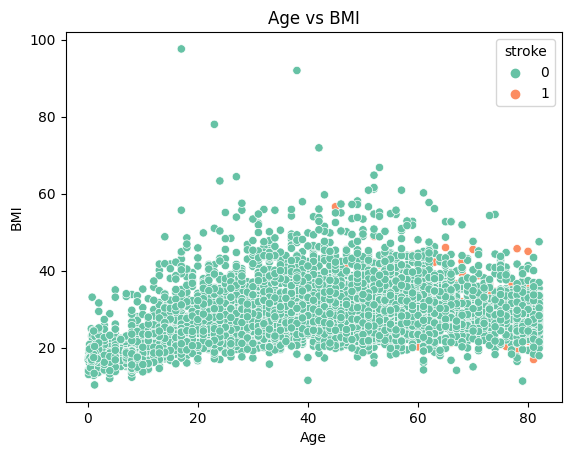

In [214]:
sns.scatterplot(x='age', y='bmi', data=stroke_data, hue='stroke', palette='Set2')
plt.title('Age vs BMI')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

##### Average Glucose Level vs. BMI

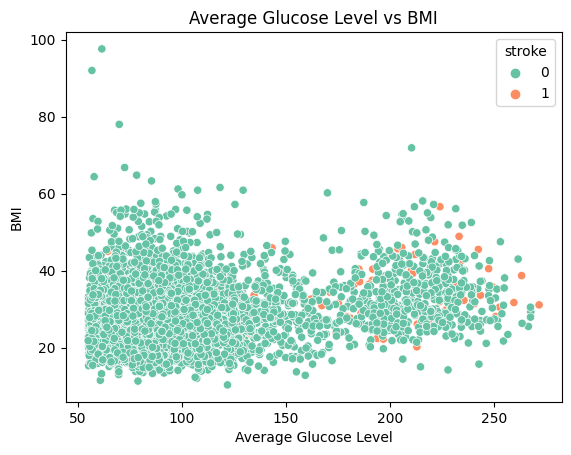

In [215]:
sns.scatterplot(x='avg_glucose_level', y='bmi', data=stroke_data, hue='stroke', palette='Set2')
plt.title('Average Glucose Level vs BMI')
plt.xlabel("Average Glucose Level")
plt.ylabel("BMI")
plt.show()

##### Age vs. Average Glucose Level

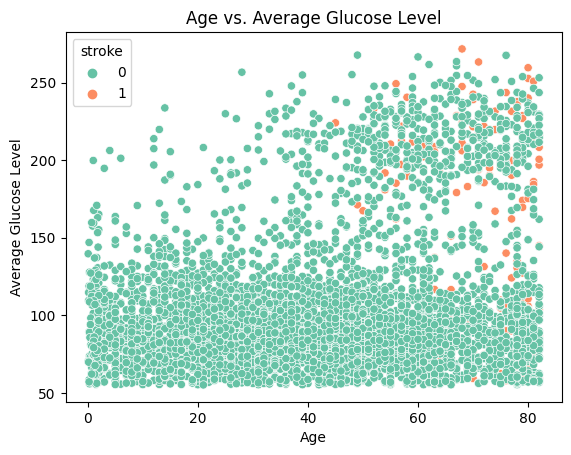

In [216]:
sns.scatterplot(x='age', y='avg_glucose_level', data=stroke_data, hue='stroke', palette='Set2')
plt.title('Age vs. Average Glucose Level')
plt.ylabel("Average Glucose Level")
plt.xlabel("Age")
plt.show()

#### Encoding Categorical Data

In [217]:
cols = stroke_data.columns
cols

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [218]:
le = LabelEncoder()
categorical_cols = ['gender', 'ever_married','work_type', 'Residence_type', 'smoking_status' ]
stroke_data[categorical_cols] = stroke_data[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,27419,0,59.0,0,0,1,2,0,76.15,NaN,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.2,0,1


#### Finding `nan` Values in Numeric Columns

In [219]:
print("Age: ", np.any(np.isnan(stroke_data['age'])))
print("Average Glucose Level: ", np.any(np.isnan(stroke_data['avg_glucose_level'])))
print("BMI: ", np.any(np.isnan(stroke_data['bmi'])))

Age:  False
Average Glucose Level:  False
BMI:  True


In [220]:
print("% of nan values in BMI feature: ", len(np.where(np.isnan(stroke_data['bmi']) == True)[0]))

% of nan values in BMI feature:  201


In [221]:
stroke_data.shape

(5110, 12)

<AxesSubplot: >

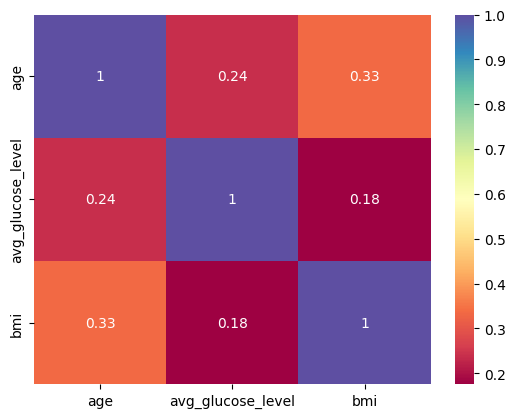

In [222]:
stroke_data_num = stroke_data[['age', 'avg_glucose_level', 'bmi']]
sns.heatmap(stroke_data_num.corr(), annot=True, cmap='Spectral')

Due to the fact, there are some missing values in BMI, it is required to use an efficient method for inputting missing values.

It is seen that BMI does not have a high correlation with the other numerical values.

#### Using K-NearestNeighbour to Compute Missing Values for BMI

In [223]:
Y = stroke_data['stroke']
X = stroke_data.drop(['stroke', 'id'], axis=1) #axis=1 -> means columns
X.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2
7,0,69.0,0,0,0,2,1,94.39,22.8,2
8,0,59.0,0,0,1,2,0,76.15,NaN,0
9,0,78.0,0,0,1,2,1,58.57,24.2,0


In [224]:
from sklearn.impute import KNNImputer

knn_impute = KNNImputer(n_neighbors=3, weights='distance').fit(X,Y)
X_imputed = knn_impute.transform(X)

#### Splitting Data into Training and Test Sets

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, Y, test_size=0.4, random_state=33)

#### Visualizing Feature Importance Using Decision Trees

[0.03433369 0.23526717 0.02821596 0.02705523 0.0203552  0.05324796
 0.0333761  0.27247512 0.23053375 0.06513982]
Feature: 0, Score: 0.03433
Feature: 1, Score: 0.23527
Feature: 2, Score: 0.02822
Feature: 3, Score: 0.02706
Feature: 4, Score: 0.02036
Feature: 5, Score: 0.05325
Feature: 6, Score: 0.03338
Feature: 7, Score: 0.27248
Feature: 8, Score: 0.23053
Feature: 9, Score: 0.06514


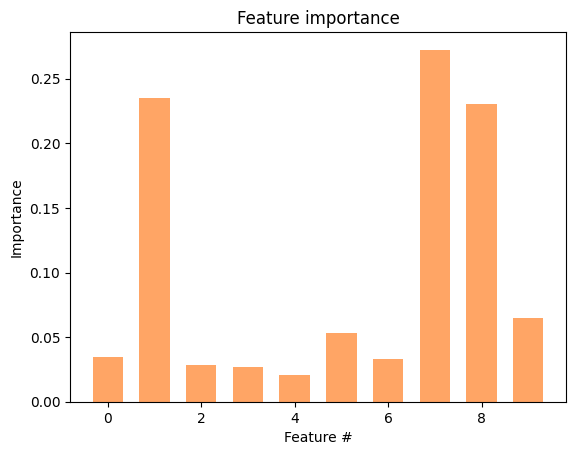

In [226]:
from sklearn.ensemble import RandomForestClassifier
decision_tree_model = RandomForestClassifier()
decision_tree_model.fit(X_train, y_train)
importance = decision_tree_model.feature_importances_

print(importance)
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance, color='#ffa565', width=0.65)
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Feature #')
plt.show()

It is seen that the most important features for predicting a stroke are: age, average glucose level, BMI, and smoking status.

In [227]:
for stroke in stroke_data['stroke'].unique():
    print(stroke, ": ", len(stroke_data[stroke_data['stroke']==stroke]))

1 :  249
0 :  4861


#### Synthetic Minority Oversampling Technique Applied on Stroke Target Feature

As the dataset is imbalanced according to the target feature of `Stroke`, new examples are synthesized from the existing examples (data augmentation) of the minority class of `Stroke = 1` using the SMOTE technique.

In [228]:
# !pip install imblearn

In [229]:
from imblearn.over_sampling import SMOTENC, SMOTE
# SMOTENC: Over-sample using SMOTE for continuous and categorical features.

# oversample = SMOTENC([0, 2, 3, 4, 5, 6, 9]) # oversampling non-numeric features
oversample = SMOTENC([0, 2, 3, 4, 5, 6, 9]) # oversampling non-numeric features

X_train, y_train = oversample.fit_resample(X_train, y_train)

##### After oversampling

In [230]:
print("Stroke: ", len(np.where(y_train == 1)[0]))
print("No Stroke: ", len(np.where(y_train == 0)[0]))

Stroke:  2920
No Stroke:  2920


### Machine Learning Model

In [231]:
from numpy import mean
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

#### Scaling Features

`sklearn.preprocessing.RobustScaler` Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)

In [232]:
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)

In [233]:
X_train.shape

(5840, 10)

In [234]:
# define model
# model = GradientBoostingClassifier()
# parameters={'loss':('deviance', 'exponential'), 'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],
#    'n_estimators':[16, 32, 64, 100, 200,500,1000],'max_depth':np.linspace(1, 32, 32, endpoint=True),
#    'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
#             'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),
#    'max_features':list(range(1,X_train.shape[1]))}
# gridSearch = GridSearchCV(model, parameters,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)
# gridSearch.fit(X_train_scaled, y_train)

In [235]:
# print(gridSearch.cv_results_['params'])
# print(gridSearch.cv_results_['mean_test_score'])

In [236]:
model = GradientBoostingClassifier(loss='log_loss', learning_rate=0.5, n_estimators=100, max_depth=5,
                                  min_samples_split=0.1, min_samples_leaf=0.01, max_features=7)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
scores = cross_validate(model, X_train_scaled, y_train, scoring=('f1', 'roc_auc'), cv=cv, n_jobs=-1)
print('Mean F1 Scores: %.3f' %mean(scores['test_f1']))
print('Mean ROC-AUC Scores: %.3f' %mean(scores['test_roc_auc']))

Mean F1 Scores: 0.937
Mean ROC-AUC Scores: 0.985


In [237]:
print("Stroke: ", len(np.where(y_test == 1)[0]))
print("No Stroke: ", len(np.where(y_test == 0)[0]))

Stroke:  103
No Stroke:  1941


In [238]:
import sklearn
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import plot_roc_curve, RocCurveDisplay

In [239]:
X_test_scaled = robust_scaler.fit_transform(X_test)
model.fit(X_train_scaled, y_train)
y_predicted = model.predict(X_test_scaled)

In [ ]:
plot_confusion_matrix(model, X_test_scaled, y_test)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
plot_roc_curve(model, X_test_scaled, y_test)
plt.show()

In [ ]:
# fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, y_predicted)
# roc_auc = sklearn.metrics.auc(fpr, tpr)
# display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='GradientBoostingClassifier')
# display.plot()
# plt.show()

In [ ]:
os.remove(stroke_data_path)